In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Define the OpenWeatherMap API key and the city
api_key = "fd4690545ac220d859ee8ed6f2041f03"# Replace with your API key
city = 'Delhi'

'''url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    print(data)'''
# Coordinates for Chennai
lat = 28.7041
lon = 77.1025

# Define the URL for the OpenWeatherMap API to fetch historical air quality data
start_time = int((datetime.datetime.now() - datetime.timedelta(days=5)).timestamp())
end_time = int(datetime.datetime.now().timestamp())
url = f'http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start_time}&end={end_time}&appid={api_key}'

# Fetch data from the API
response = requests.get(url)


response

<Response [200]>

In [3]:
if response.status_code == 200:
    data = response.json()
    print(data)

{'coord': {'lon': 77.1025, 'lat': 28.7041}, 'list': [{'main': {'aqi': 5}, 'components': {'co': 1188.28, 'no': 0, 'no2': 37.36, 'o3': 85.12, 'so2': 17.88, 'pm2_5': 98.58, 'pm10': 138.34, 'nh3': 22.8}, 'dt': 1734184800}, {'main': {'aqi': 5}, 'components': {'co': 1228.33, 'no': 0, 'no2': 37.01, 'o3': 77.96, 'so2': 16.45, 'pm2_5': 106.01, 'pm10': 150.6, 'nh3': 25.33}, 'dt': 1734188400}, {'main': {'aqi': 5}, 'components': {'co': 1228.33, 'no': 0, 'no2': 35.64, 'o3': 73.67, 'so2': 15.26, 'pm2_5': 112.04, 'pm10': 158.55, 'nh3': 26.09}, 'dt': 1734192000}, {'main': {'aqi': 5}, 'components': {'co': 1214.98, 'no': 0, 'no2': 33.93, 'o3': 69.38, 'so2': 13.95, 'pm2_5': 116.12, 'pm10': 163.27, 'nh3': 25.08}, 'dt': 1734195600}, {'main': {'aqi': 5}, 'components': {'co': 1134.87, 'no': 0, 'no2': 31.53, 'o3': 66.52, 'so2': 11.44, 'pm2_5': 114.73, 'pm10': 156.88, 'nh3': 21.03}, 'dt': 1734199200}, {'main': {'aqi': 5}, 'components': {'co': 1041.41, 'no': 0, 'no2': 28.1, 'o3': 64.37, 'so2': 9.3, 'pm2_5': 112

In [4]:
# Extract measurements from the response
measurements = data['list']
measurements


[{'main': {'aqi': 5},
  'components': {'co': 1188.28,
   'no': 0,
   'no2': 37.36,
   'o3': 85.12,
   'so2': 17.88,
   'pm2_5': 98.58,
   'pm10': 138.34,
   'nh3': 22.8},
  'dt': 1734184800},
 {'main': {'aqi': 5},
  'components': {'co': 1228.33,
   'no': 0,
   'no2': 37.01,
   'o3': 77.96,
   'so2': 16.45,
   'pm2_5': 106.01,
   'pm10': 150.6,
   'nh3': 25.33},
  'dt': 1734188400},
 {'main': {'aqi': 5},
  'components': {'co': 1228.33,
   'no': 0,
   'no2': 35.64,
   'o3': 73.67,
   'so2': 15.26,
   'pm2_5': 112.04,
   'pm10': 158.55,
   'nh3': 26.09},
  'dt': 1734192000},
 {'main': {'aqi': 5},
  'components': {'co': 1214.98,
   'no': 0,
   'no2': 33.93,
   'o3': 69.38,
   'so2': 13.95,
   'pm2_5': 116.12,
   'pm10': 163.27,
   'nh3': 25.08},
  'dt': 1734195600},
 {'main': {'aqi': 5},
  'components': {'co': 1134.87,
   'no': 0,
   'no2': 31.53,
   'o3': 66.52,
   'so2': 11.44,
   'pm2_5': 114.73,
   'pm10': 156.88,
   'nh3': 21.03},
  'dt': 1734199200},
 {'main': {'aqi': 5},
  'componen

In [5]:
#convert the measurements to a dataframe
df = pd.DataFrame(measurements)
df

,main,components,dt
0,{'aqi': 5},"{'co': 1188.28, 'no': 0, 'no2': 37.36, 'o3': 8...",1734184800
1,{'aqi': 5},"{'co': 1228.33, 'no': 0, 'no2': 37.01, 'o3': 7...",1734188400
2,{'aqi': 5},"{'co': 1228.33, 'no': 0, 'no2': 35.64, 'o3': 7...",1734192000
3,{'aqi': 5},"{'co': 1214.98, 'no': 0, 'no2': 33.93, 'o3': 6...",1734195600
4,{'aqi': 5},"{'co': 1134.87, 'no': 0, 'no2': 31.53, 'o3': 6...",1734199200
...,...,...,...
115,{'aqi': 5},"{'co': 2937.32, 'no': 6.48, 'no2': 100.08, 'o3...",1734598800
116,{'aqi': 5},"{'co': 2777.1, 'no': 4.53, 'no2': 98.71, 'o3':...",1734602400
117,{'aqi': 5},"{'co': 3177.64, 'no': 3.21, 'no2': 127.49, 'o3...",1734606000
118,{'aqi': 5},"{'co': 3791.81, 'no': 0.87, 'no2': 175.48, 'o3...",1734609600


In [6]:
#convert the timestamp to a dataframe
df['dt'] = pd.to_datetime(df['dt'], unit='s')
df['dt']

0     2024-12-14 14:00:00
1     2024-12-14 15:00:00
2     2024-12-14 16:00:00
3     2024-12-14 17:00:00
4     2024-12-14 18:00:00
              ...        
115   2024-12-19 09:00:00
116   2024-12-19 10:00:00
117   2024-12-19 11:00:00
118   2024-12-19 12:00:00
119   2024-12-19 13:00:00
Name: dt, Length: 120, dtype: datetime64[ns]

In [7]:
#Extract yhe components (pollutants) data 
components = df['components'].apply(pd.Series)
components

,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,1188.28,0.00,37.36,85.12,17.88,98.58,138.34,22.80
1,1228.33,0.00,37.01,77.96,16.45,106.01,150.60,25.33
2,1228.33,0.00,35.64,73.67,15.26,112.04,158.55,26.09
3,1214.98,0.00,33.93,69.38,13.95,116.12,163.27,25.08
4,1134.87,0.00,31.53,66.52,11.44,114.73,156.88,21.03
...,...,...,...,...,...,...,...,...
115,2937.32,6.48,100.08,150.20,173.57,398.98,433.97,1.66
116,2777.10,4.53,98.71,127.32,146.87,369.54,408.54,7.47
117,3177.64,3.21,127.49,80.82,129.70,387.24,441.96,16.72
118,3791.81,0.87,175.48,33.26,117.30,410.39,483.19,25.08


In [8]:
#drop the original components columns
df = pd.concat([df, components], axis=1).drop(columns=['components'])
df

,main,dt,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,{'aqi': 5},2024-12-14 14:00:00,1188.28,0.00,37.36,85.12,17.88,98.58,138.34,22.80
1,{'aqi': 5},2024-12-14 15:00:00,1228.33,0.00,37.01,77.96,16.45,106.01,150.60,25.33
2,{'aqi': 5},2024-12-14 16:00:00,1228.33,0.00,35.64,73.67,15.26,112.04,158.55,26.09
3,{'aqi': 5},2024-12-14 17:00:00,1214.98,0.00,33.93,69.38,13.95,116.12,163.27,25.08
4,{'aqi': 5},2024-12-14 18:00:00,1134.87,0.00,31.53,66.52,11.44,114.73,156.88,21.03
...,...,...,...,...,...,...,...,...,...,...
115,{'aqi': 5},2024-12-19 09:00:00,2937.32,6.48,100.08,150.20,173.57,398.98,433.97,1.66
116,{'aqi': 5},2024-12-19 10:00:00,2777.10,4.53,98.71,127.32,146.87,369.54,408.54,7.47
117,{'aqi': 5},2024-12-19 11:00:00,3177.64,3.21,127.49,80.82,129.70,387.24,441.96,16.72
118,{'aqi': 5},2024-12-19 12:00:00,3791.81,0.87,175.48,33.26,117.30,410.39,483.19,25.08


In [9]:
#set the datetime as the index 
df = df.set_index("dt")
df

,main,co,no,no2,o3,so2,pm2_5,pm10,nh3
dt,,,,,,,,,
2024-12-14 14:00:00,{'aqi': 5},1188.28,0.00,37.36,85.12,17.88,98.58,138.34,22.80
2024-12-14 15:00:00,{'aqi': 5},1228.33,0.00,37.01,77.96,16.45,106.01,150.60,25.33
2024-12-14 16:00:00,{'aqi': 5},1228.33,0.00,35.64,73.67,15.26,112.04,158.55,26.09
2024-12-14 17:00:00,{'aqi': 5},1214.98,0.00,33.93,69.38,13.95,116.12,163.27,25.08
2024-12-14 18:00:00,{'aqi': 5},1134.87,0.00,31.53,66.52,11.44,114.73,156.88,21.03
...,...,...,...,...,...,...,...,...,...
2024-12-19 09:00:00,{'aqi': 5},2937.32,6.48,100.08,150.20,173.57,398.98,433.97,1.66
2024-12-19 10:00:00,{'aqi': 5},2777.10,4.53,98.71,127.32,146.87,369.54,408.54,7.47
2024-12-19 11:00:00,{'aqi': 5},3177.64,3.21,127.49,80.82,129.70,387.24,441.96,16.72


In [10]:
#print the first few rows of the dataframe 
print(df.head())

                           main       co   no    no2     o3    so2   pm2_5  \
dt                                                                           
2024-12-14 14:00:00  {'aqi': 5}  1188.28  0.0  37.36  85.12  17.88   98.58   
2024-12-14 15:00:00  {'aqi': 5}  1228.33  0.0  37.01  77.96  16.45  106.01   
2024-12-14 16:00:00  {'aqi': 5}  1228.33  0.0  35.64  73.67  15.26  112.04   
2024-12-14 17:00:00  {'aqi': 5}  1214.98  0.0  33.93  69.38  13.95  116.12   
2024-12-14 18:00:00  {'aqi': 5}  1134.87  0.0  31.53  66.52  11.44  114.73   

                       pm10    nh3  
dt                                  
2024-12-14 14:00:00  138.34  22.80  
2024-12-14 15:00:00  150.60  25.33  
2024-12-14 16:00:00  158.55  26.09  
2024-12-14 17:00:00  163.27  25.08  
2024-12-14 18:00:00  156.88  21.03  


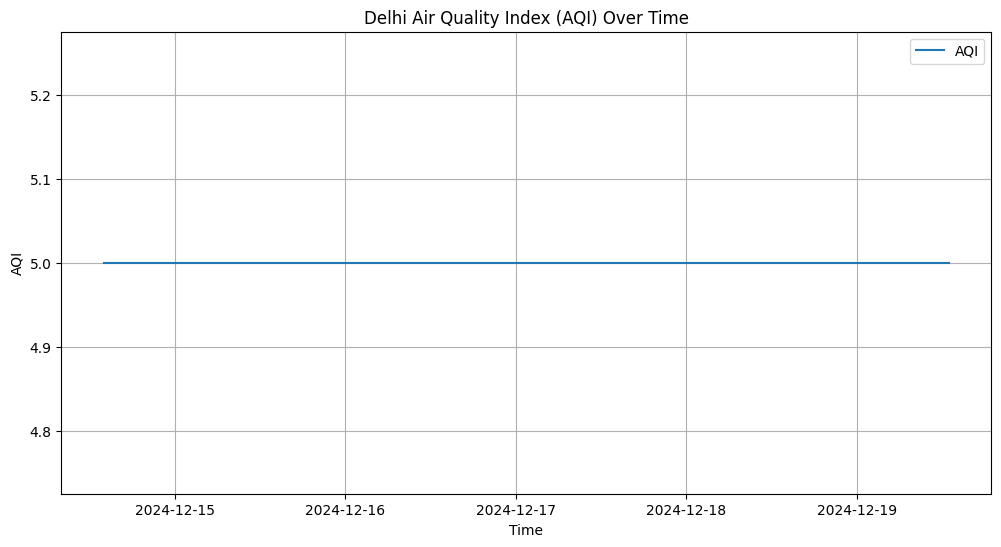

In [11]:
 # Plot the AQI over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['main'].apply(lambda x: x['aqi']), label='AQI')
plt.title(f'{city} Air Quality Index (AQI) Over Time')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

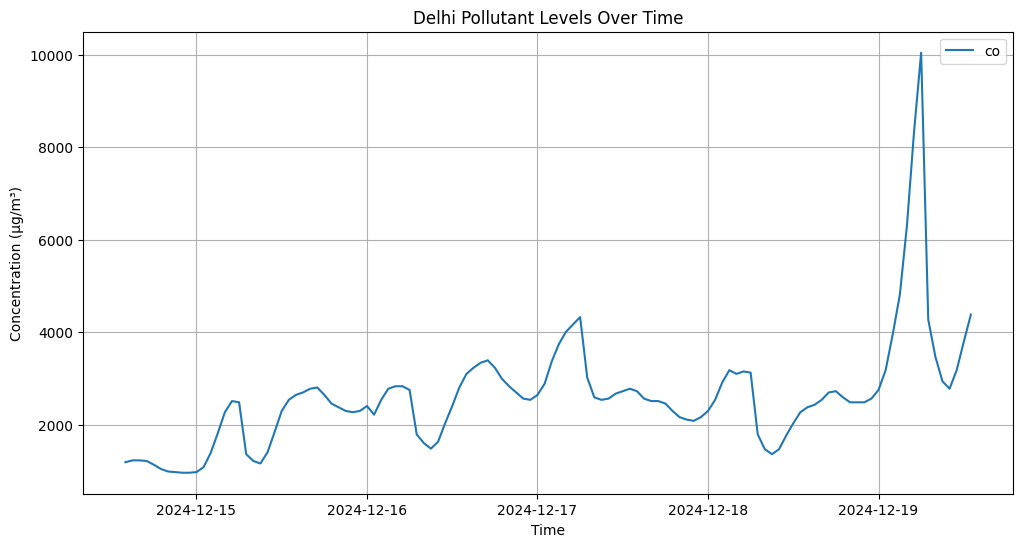

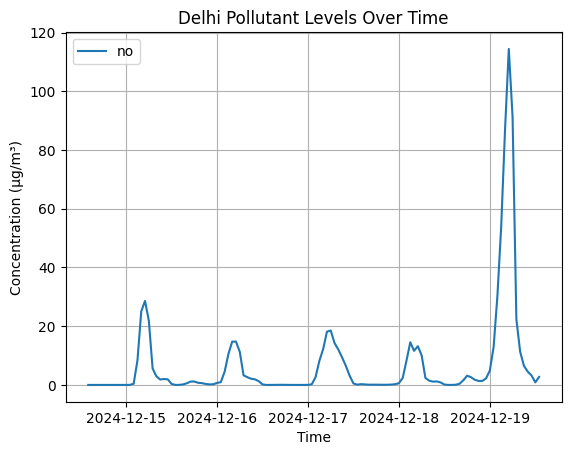

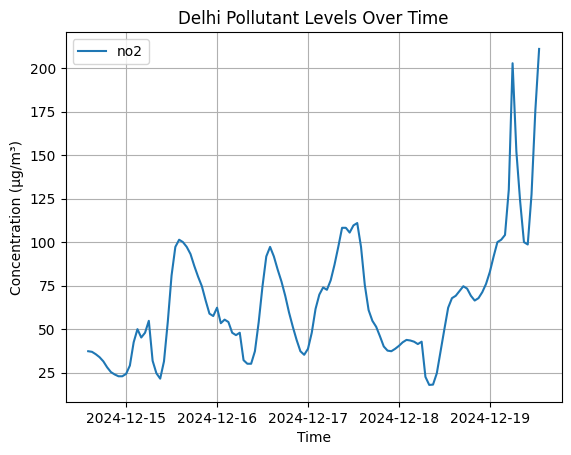

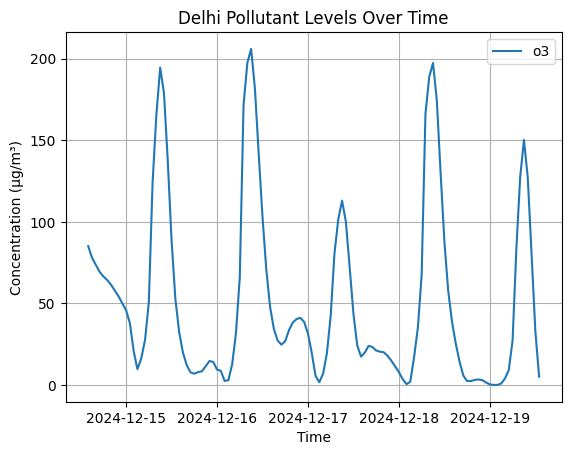

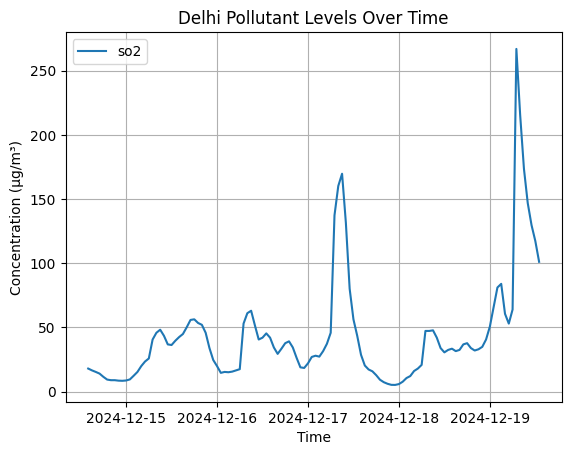

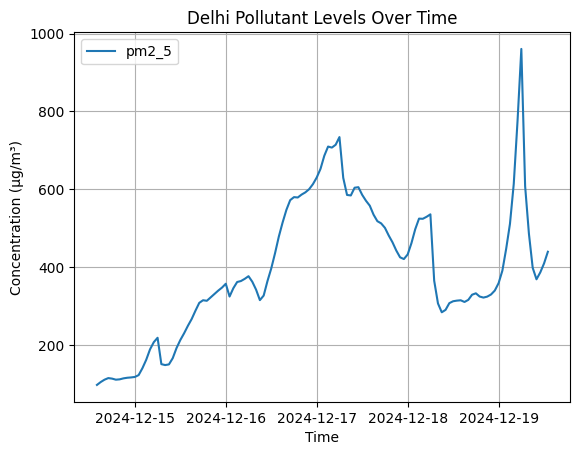

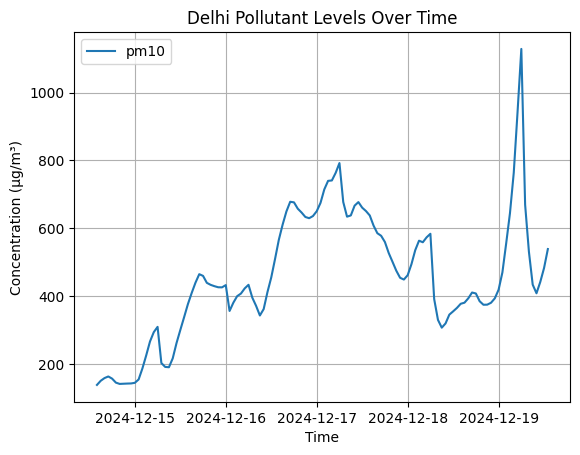

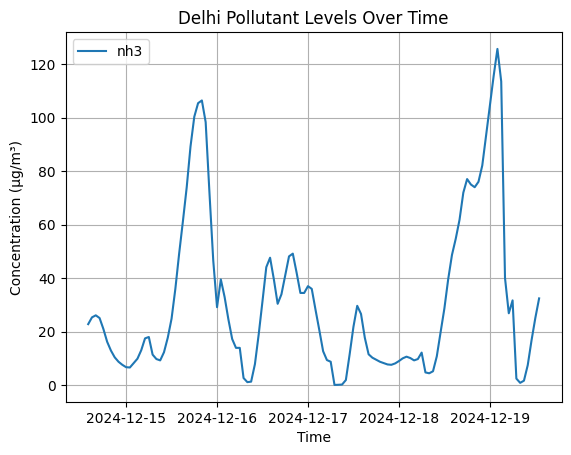

In [12]:

             # Plot the pollutant levels over time
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    plt.plot(df.index, df[pollutant], label=pollutant)
    plt.title(f'{city} Pollutant Levels Over Time')
    plt.xlabel('Time')
    plt.ylabel('Concentration (µg/m³)')

    plt.legend()

    plt.grid(True)
    plt.show()
           

In [13]:

 # Calculate and print summary statistics for AQI
df['AQI'] = df['main'].apply(lambda x: x['aqi'])
aqi_summary = df['AQI'].describe()
print("AQI_summary statistics:")
print(aqi_summary)

   

AQI_summary statistics:
count    120.0
mean       5.0
std        0.0
min        5.0
25%        5.0
50%        5.0
75%        5.0
max        5.0
Name: AQI, dtype: float64


In [ ]:
#calculate and the print correlation matrix for pollutants 
